<a href="https://colab.research.google.com/github/mani2106/Competition-Notebooks/blob/master/HDFC%20Banking%20scorecard/HDFC_Banking_scorecard_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Prepare storage and get Data

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [4]:
!wget -O data.zip http://hck.re/TT3Xkb

--2019-09-25 15:59:34--  http://hck.re/TT3Xkb
Resolving hck.re (hck.re)... 54.251.154.115, 52.76.109.201, 52.74.52.197
Connecting to hck.re (hck.re)|54.251.154.115|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Cookie coming from hck.re attempted to set domain to hackerearth.com
Cookie coming from hck.re attempted to set domain to hackerearth.com
Cookie coming from hck.re attempted to set domain to hackerearth.com
Location: https://he-s3.s3.amazonaws.com/media/hackathon/hdfc-bank-ml-hiring-challenge-2019/banking-behavioral-scorecard-for-internal-liability-customers-4caf1786/d407ebe0db9a11e9.zip [following]
--2019-09-25 15:59:35--  https://he-s3.s3.amazonaws.com/media/hackathon/hdfc-bank-ml-hiring-challenge-2019/banking-behavioral-scorecard-for-internal-liability-customers-4caf1786/d407ebe0db9a11e9.zip
Resolving he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)... 52.219.40.116
Connecting to he-s3.s3.amazonaws.com (he-s3.s3.amazonaws.com)|52.219.40.116|:44

In [5]:
!unzip data.zip

Archive:  data.zip
   creating: DataSet/
  inflating: DataSet/Train.csv       
  inflating: DataSet/Sample_submission.csv  
  inflating: DataSet/Test.csv        


### Understanding the Problem statement

Referring to the competition description 

``The definition that is used for the target variable is every 30+ or X+ days delinquent twice in forward  12 months.``

If I understand correctly the target variable predicts the number of times that the particular customer will become delinquent (i.e). Fails to pay his dues in the period mentioned.

###Import Libraries

In [0]:
import pandas as pd
from tqdm import tqdm_notebook
from pathlib import Path

### Read data

In [0]:
DATA_PATH = Path('DataSet')

In [9]:
train_data = pd.read_csv(DATA_PATH/'Train.csv')
train_data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGHGSN,1,1.086711e+04,8.648345e+03,1.576618e+04,2.890466e+04,5.273655e+03,2.346153e+04,1.285597e+04,2.871509e+04,9.114586e+03,3.043078e+04,9.293496,8.570479,10.063117,10.271758,0.548538,0.403366,NaN,NaN,1.486524,1.728324,0.993441,1.297050,0.137398,0.115987,0.260428,1.414214,1,1,1,1,1,1,0,6,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,214.0,214.0,68.0,22.0,22.0,7.0
1,RIMHI5ZGP,0,2.584312e+05,2.179633e+05,1.866287e+05,1.866287e+05,2.154519e+05,1.923615e+05,1.726538e+05,1.666974e+05,2.013518e+05,1.859404e+05,12.462385,12.280493,12.167132,12.136876,1.167898,2.676398,NaN,NaN,0.792123,0.934556,0.893203,0.966620,0.753892,0.808295,1.414214,NaN,1,1,3,4,4,0,4,5,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,41.0,41.0,38.0,12.0,12.0,11.0
2,RIHOG1SZU,0,1.459355e+07,1.260060e+07,1.100315e+07,1.010315e+07,1.879882e+07,1.514035e+07,5.320778e+06,6.906324e+06,9.368338e+06,1.113330e+07,16.496090,16.749305,16.532874,16.128357,1.145182,2.203874,NaN,NaN,0.422264,0.498347,0.683582,0.735339,0.808115,0.776910,1.414214,NaN,3,3,4,12,4,0,2,4,NaN,1.0,NaN,NaN,...,1,0,1,0,1,0,0,0,0,0,2,0,1,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,1,0,378.0,378.0,310.0,21.0,21.0,16.0
3,RIHOLMQWU,0,6.727043e+05,8.181116e+05,6.794893e+05,6.794893e+05,8.257254e+05,7.605803e+05,3.577134e+05,4.236612e+05,4.304848e+05,4.065539e+05,13.419061,13.624018,13.541837,13.429097,1.204010,0.536304,NaN,NaN,0.437243,0.521341,0.623499,0.534531,-0.125829,0.388830,-1.414214,NaN,2,2,2,24,1,0,1,4,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,1,2,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,1,2,0,0,0,0,0,0,702.0,702.0,644.0,951.0,951.0,743.0
4,RIHO584ET,0,-1.218742e+06,-3.005361e+06,-1.666241e+05,-2.403574e+06,2.583183e+06,2.086546e+06,5.938358e+06,5.446532e+06,3.473444e+06,3.262168e+06,NaN,14.764533,14.551021,NaN,NaN,NaN,NaN,NaN,NaN,1.344637,NaN,1.563430,-0.113101,0.617486,1.414214,NaN,4,3,4,68,8,0,2,4,NaN,3.0,NaN,NaN,...,0,0,0,0,0,0,2,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1305.0,1305.0,1211.0,2205.0,2205.0,1831.0


### Check data

In [10]:
train_data.shape

(17521, 2395)

This is a huge number of columns, We have been warned by pandas that **Col746** and **Col835** has mixed dtypes, Let's check them.

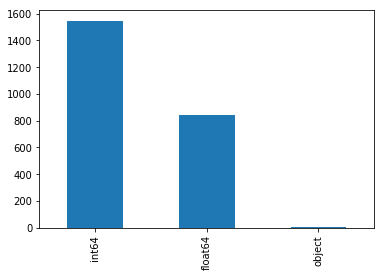

In [15]:
train_data.dtypes.value_counts().plot.bar()

Let's check the object type columns since that is quite low in the dataset

In [17]:
object_cols = train_data.select_dtypes(['object'])
object_cols.head()

,Col1,Col747,Col836
0,RIGHGSN,NaN,NaN
1,RIMHI5ZGP,NaN,NaN
2,RIHOG1SZU,NaN,NaN
3,RIHOLMQWU,NaN,NaN
4,RIHO584ET,NaN,NaN


### Let's check the number of nan values

In [19]:
object_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17521 entries, 0 to 17520
Data columns (total 3 columns):
Col1      17521 non-null object
Col747    626 non-null object
Col836    624 non-null object
dtypes: object(3)
memory usage: 410.7+ KB


Ignoring **Col1** since it is an ID column and highly unlikely to have any information, we can see that it has too many **NaN** values, let's check the values present in the columns

In [21]:
object_cols.loc[:, 'Col747'].value_counts()

0      443
-      133
0.0     46
1        2
3        1
5.0      1
Name: Col747, dtype: int64

In [22]:
object_cols.loc[:, 'Col836'].value_counts()

0      438
-      144
0.0     41
5        1
Name: Col836, dtype: int64